In [21]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [22]:
data_dir = '/Users/rajat74/Downloads/data/food-101-tiny'
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')

In [23]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for subdir, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
                img_path = os.path.join(subdir, file)
                image = Image.open(img_path)
                image = image.resize((128, 128))  # Resize the images to a common size
                images.append(np.array(image))
                labels.append(os.path.basename(subdir))
    return np.array(images), np.array(labels)

In [24]:
train_images, train_labels = load_images_from_folder(train_dir)
valid_images, valid_labels = load_images_from_folder(valid_dir)
print(f"Loaded {len(train_images)} training images with {len(set(train_labels))} classes.")
print(f"Loaded {len(valid_images)} validation images with {len(set(valid_labels))} classes.")

Loaded 1500 training images with 10 classes.
Loaded 500 validation images with 10 classes.


In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance for training and validation
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
valid_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load images from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 1500 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and save it
history = model.fit(train_generator, epochs=10, validation_data=valid_generator)


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step - accuracy: 0.1195 - loss: 8.1511 - val_accuracy: 0.1840 - val_loss: 2.1482
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.2752 - loss: 2.0559 - val_accuracy: 0.3320 - val_loss: 1.9214
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 183ms/step - accuracy: 0.4447 - loss: 1.6865 - val_accuracy: 0.3180 - val_loss: 1.8543
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - accuracy: 0.6042 - loss: 1.2755 - val_accuracy: 0.3540 - val_loss: 1.8774
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - accuracy: 0.7755 - loss: 0.9059 - val_accuracy: 0.3580 - val_loss: 1.8926
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.9137 - loss: 0.4904 - val_accuracy: 0.3740 - val_loss: 2.0204
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - accuracy: 0.9715 - loss: 0.2459 - val_accuracy: 0.3440 - val_loss: 2.0653
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 194ms/step - accuracy: 0.9881 - loss: 0.1399 - val_accuracy: 0

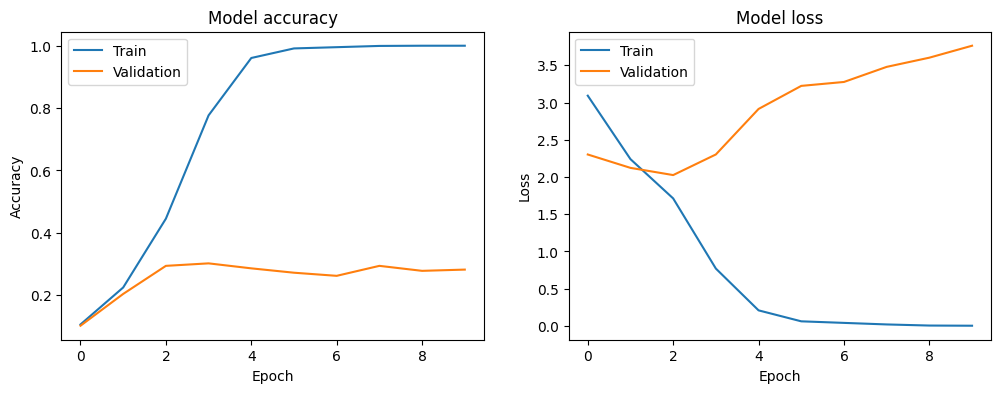

In [35]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [36]:
# Save the model
model.save('food_classification_model.h5')

# Load the model
model = tf.keras.models.load_model('food_classification_model.h5')


In [41]:
# Load a new image
new_image_path = '/Users/rajat74/Downloads/data/food-101-tiny/valid/ice_cream/1272987.jpg'
new_image = Image.open(new_image_path)
new_image = new_image.resize((128, 128))
new_image = np.array(new_image) / 255.0  # Normalize to [0, 1]
new_image = np.expand_dims(new_image, axis=0)  # Add batch dimension

# Make a prediction
predictions = model.predict(new_image)
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted class: [5]
